<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/lern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=f72bd02545da1a73a6bd876111b3eb186d16b6e4a670949517963a73931d6354
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [13]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

**Define functions**

In [4]:
def get_largest_value_array(Data, columns):
    # Subset the data frame to only include the specified columns
    sub_data = Data[columns]

    # Use the apply() function with the max() function to find the maximum value in each row of the subsetted data frame
    max_values = sub_data.apply(max, axis=1)

    # Create a new array that takes the maximum value from step 2 for each row of the original data frame
    max_array = np.array(max_values)
    
    return max_array
  
def get_smallest_value_array(Data, columns):
    # Subset the data frame to only include the specified columns
    sub_data = Data[columns]

    # Use the min() function to find the minimum value in each row of the subsetted data frame
    min_values = sub_data.min(axis=1)

    # Create a new array that takes the minimum value from step 2 for each row of the original data frame
    min_array = np.array(min_values)
    
    return min_array

def get_array_bo_greater_than_bc(Data):
    # Use np.where() to compare the "BO" and "BC" columns, return 1 if "BO" < "BC", and 0 otherwise
    result_array = np.where(Data["BO"] < Data["BC"], 1, 0)
    
    return result_array

**Load Data**

In [5]:
Data = pd.read_csv('/content/drive/MyDrive/eurusd_hour.csv')
Data['Date'] = pd.to_datetime(Data['Date'])
Data['Time'] = pd.to_datetime(Data['Time'])
print(Data)

            Date                Time       BO       BH       BL       BC  \
0     2005-05-02 2023-05-23 00:00:00  1.28520  1.28520  1.28400  1.28440   
1     2005-05-02 2023-05-23 01:00:00  1.28440  1.28480  1.28390  1.28420   
2     2005-05-02 2023-05-23 02:00:00  1.28430  1.28540  1.28410  1.28510   
3     2005-05-02 2023-05-23 03:00:00  1.28510  1.28590  1.28500  1.28510   
4     2005-05-02 2023-05-23 04:00:00  1.28520  1.28590  1.28490  1.28550   
...          ...                 ...      ...      ...      ...      ...   
93079 2020-04-29 2023-05-23 18:00:00  1.08620  1.08851  1.08611  1.08713   
93080 2020-04-29 2023-05-23 19:00:00  1.08711  1.08823  1.08659  1.08748   
93081 2020-04-29 2023-05-23 20:00:00  1.08747  1.08788  1.08691  1.08708   
93082 2020-04-29 2023-05-23 21:00:00  1.08708  1.08740  1.08699  1.08714   
93083 2020-04-29 2023-05-23 22:00:00  1.08728  1.08760  1.08727  1.08743   

           BCh       AO       AH       AL       AC      ACh  
0     -0.00080  1.28540  

**Extract time information**

In [6]:
Date = pd.DataFrame()

Date['day'] = Data['Date'].dt.day
Date['month'] = Data['Date'].dt.month
Date['weekday'] = Data['Date'].dt.weekday
Date['hour_of_day'] = Data['Time'].dt.hour

print(Date)

       day  month  weekday  hour_of_day
0        2      5        0            0
1        2      5        0            1
2        2      5        0            2
3        2      5        0            3
4        2      5        0            4
...    ...    ...      ...          ...
93079   29      4        2           18
93080   29      4        2           19
93081   29      4        2           20
93082   29      4        2           21
93083   29      4        2           22

[93084 rows x 4 columns]


**Candle stick and other chart info**

In [7]:
Shape = pd.DataFrame()

abs_diff_array = np.abs(Data['BH'] - Data['BL'])

updown_array = get_array_bo_greater_than_bc(Data)

max_array = get_largest_value_array(Data,["BC", "BO"])
min_array = get_smallest_value_array(Data,["BC", "BO"])

tp_array = (Data['BH']-min_array)/abs_diff_array
bp_array = (Data['BH']-max_array)/abs_diff_array

RelChange = Data['BC'] - Data['BO']

Shape["Direction"] = updown_array
Shape["Bottom_Point"] = bp_array
Shape["Top_Point"] = tp_array
Shape["Relative_Change"] = RelChange
Shape["Size"] = abs_diff_array


#print(Shape)
result = pd.concat([Date, Shape], axis=1)
print(result)

       day  month  weekday  hour_of_day  Direction  Bottom_Point  Top_Point  \
0        2      5        0            0          0      0.000000   0.666667   
1        2      5        0            1          0      0.444444   0.666667   
2        2      5        0            2          1      0.230769   0.846154   
3        2      5        0            3          0      0.888889   0.888889   
4        2      5        0            4          1      0.400000   0.700000   
...    ...    ...      ...          ...        ...           ...        ...   
93079   29      4        2           18          1      0.575000   0.962500   
93080   29      4        2           19          1      0.457317   0.682927   
93081   29      4        2           20          0      0.422680   0.824742   
93082   29      4        2           21          1      0.634146   0.780488   
93083   29      4        2           22          1      0.515152   0.969697   

       Relative_Change     Size  
0             -0.

**Technical analysis**

(2000.0, 2100.0)

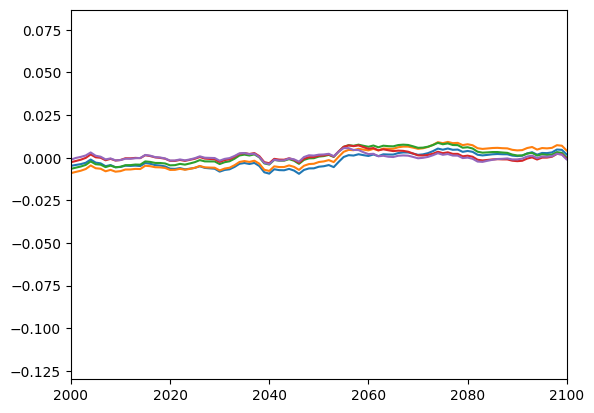

In [20]:
techana = pd.DataFrame()

close = Data["BC"]

sma10 = ta.sma(close,10)-close
sma20 = ta.sma(close,20)-close
sma50 = ta.sma(close,50)-close
sma100 = ta.sma(close,100)-close
sma200 = ta.sma(close,200)-close

plt.plot(sma200)
plt.plot(sma100)
plt.plot(sma50)
plt.plot(sma20)
plt.plot(sma10)




plt.xlim(2000,2100)